In [1]:
from ple.games.pong import Pong

from ple.games.flappybird import FlappyBird

import os

os.putenv('SDL_VIDEODRIVER', 'fbcon')
os.environ["SDL_VIDEODRIVER"] = "dummy"

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html
couldn't import doomish
Couldn't import doom


In [2]:
game = FlappyBird()

In [3]:
from torchvision import transforms

In [4]:
from ple import PLE

p = PLE(game, fps=30, display_screen=True, force_fps=False)
p.init()

In [5]:
p.reset_game()

In [6]:
p.init()

In [7]:
p.getActionSet()

[119, None]

In [8]:
p.game_over()

False

In [9]:
p.act(None)

0.0

In [3]:
import sys

In [11]:
sys.path.append('../testscripts/')

In [12]:
from DQNAgent import *

In [13]:
replay_mem = ReplayMemory(100)

In [14]:
replay_mem.push(1,2,3,4)

## Image Testing

In [15]:
from PIL import Image
import torch
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt

In [16]:
p.act(None)

0.0

In [17]:
img = p.getScreenGrayscale()

In [18]:
resizer = transforms.Resize([84,84])

In [20]:
img_out = resizer(Image.fromarray(img))

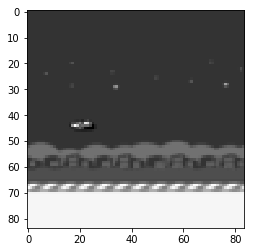

In [21]:
plt.imshow(np.array(img_out).T, cmap='gray')

In [47]:
output = torch.Tensor(np.array(img_out)).permute(1,0)

In [52]:
a = Image.fromarray(output.numpy())

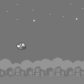

In [53]:
a.convert('RGB')

In [102]:
import cv2

ModuleNotFoundError: No module named 'cv2'

## Datetime stuff

In [93]:
import datetime

now = datetime.datetime.now()

In [101]:
now.strftime("%Y-%m-%d-%H-%M")

'2018-11-16-01-02'

## Profile Loss

In [1]:
from ple import PLE
from ple.games.flappybird import FlappyBird
import os

os.putenv('SDL_VIDEODRIVER', 'fbcon')
os.environ["SDL_VIDEODRIVER"] = "dummy"

import sys

sys.path.append('../testscripts/')

import numpy as np

from DQNAgent import *

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html
couldn't import doomish
Couldn't import doom


In [2]:
game = FlappyBird()
p = PLE(game, fps=30, display_screen=False)
p.init()

flappy_agent = DQNAgent(p.getActionSet(), frame_stack=4)

flappy_trainer = Trainer(p, flappy_agent, ReplayMemory, batch_size=32, memory_size=10000)

In [3]:
flappy_trainer.episode()

/home/fiorenza2/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/fiorenza2/.local/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [4]:
batch = flappy_trainer.memory.sample(32)

In [5]:
%load_ext line_profiler

In [6]:
%lprun -f flappy_trainer.loss flappy_trainer.loss(batch)

In [34]:
np.stack(batch.state).shape

(32, 4, 84, 84)

In [45]:
batch = flappy_trainer.memory.sample(32)

In [46]:
%timeit torch.tensor(np.stack(batch.state), dtype=torch.float, device='cpu') / 255

1.44 ms ± 285 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [44]:
%timeit torch.tensor(batch.state)

69.9 ms ± 1.01 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [1]:
from ple.games.pong import Pong

from ple.games.flappybird import FlappyBird

import os

os.putenv('SDL_VIDEODRIVER', 'fbcon')
os.environ["SDL_VIDEODRIVER"] = "dummy"

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html
couldn't import doomish
Couldn't import doom


# Frameskip

In [2]:
from ple.games.pong import Pong

from ple.games.flappybird import FlappyBird

from ple import PLE

import os

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html
couldn't import doomish
Couldn't import doom


In [3]:
game = FlappyBird()

In [4]:
p = PLE(game, fps=30, display_screen=True, force_fps=False, frame_skip=4)
p.init()

In [5]:
p.reset_game()

In [6]:
p.init()

In [7]:
p.getActionSet()

[119, None]

In [8]:
p.act(None)

0.0

In [10]:
p.getScreenGrayscale().shape

(288, 512)

In [8]:
p.game_over()

False